In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from collections import Counter
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

#!pip install wordcloud
#!pip install pyLDAvis

from wordcloud import WordCloud
import pyLDAvis.gensim as gensimvis
import pyLDAvis

#nltk.download('vader_lexicon')
#nltk.download('wordnet')


In [55]:
#question 3
df = pd.read_csv("C:/Users/Emmanuel/Documents/Data Science/ITNPA4-34 Natural Language Processing with Python/Project 1/articles_dataset.csv",header = 0,sep=",")
df.tail()


,publish_date,headline_text
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...
1244183,20211231,what makes you a close covid contact here are ...


In [56]:
stop_w = set(stopwords.words('english')) 

### 3.1. 

In [57]:
df_t=df.copy()

def token_stopwords(text):
    tokens = word_tokenize(text)  # Tokenize
    return [word for word in tokens if word not in stop_w]  #Remove stopwords

# Apply the function to each row in headline_text
df_t['tokens'] = df_t['headline_text'].apply(token_stopwords)

In [58]:
df_t.head()

,publish_date,headline_text,tokens
0,20030219,aba decides against community broadcasting lic...,"[aba, decides, community, broadcasting, licence]"
1,20030219,act fire witnesses must be aware of defamation,"[act, fire, witnesses, must, aware, defamation]"
2,20030219,a g calls for infrastructure protection summit,"[g, calls, infrastructure, protection, summit]"
3,20030219,air nz staff in aust strike for pay rise,"[air, nz, staff, aust, strike, pay, rise]"
4,20030219,air nz strike to affect australian travellers,"[air, nz, strike, affect, australian, travellers]"


### 3.2

In [59]:
vader = SentimentIntensityAnalyzer()

df_t['scores'] = df_t['headline_text'].apply(lambda headline: vader.polarity_scores(headline))
df_t.head()

,publish_date,headline_text,tokens,scores
0,20030219,aba decides against community broadcasting lic...,"[aba, decides, community, broadcasting, licence]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,20030219,act fire witnesses must be aware of defamation,"[act, fire, witnesses, must, aware, defamation]","{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp..."
2,20030219,a g calls for infrastructure protection summit,"[g, calls, infrastructure, protection, summit]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,20030219,air nz staff in aust strike for pay rise,"[air, nz, staff, aust, strike, pay, rise]","{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'comp..."
4,20030219,air nz strike to affect australian travellers,"[air, nz, strike, affect, australian, travellers]","{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound..."


In [60]:
#get the compund score
df_t['CSS'] = df_t['scores'].apply(lambda score_dict: score_dict['compound'])
df_t.head()

,publish_date,headline_text,tokens,scores,CSS
0,20030219,aba decides against community broadcasting lic...,"[aba, decides, community, broadcasting, licence]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,20030219,act fire witnesses must be aware of defamation,"[act, fire, witnesses, must, aware, defamation]","{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...",-0.3400
2,20030219,a g calls for infrastructure protection summit,"[g, calls, infrastructure, protection, summit]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,20030219,air nz staff in aust strike for pay rise,"[air, nz, staff, aust, strike, pay, rise]","{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'comp...",-0.2263
4,20030219,air nz strike to affect australian travellers,"[air, nz, strike, affect, australian, travellers]","{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound...",-0.1280


C:\Users\Emmanuel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Emmanuel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


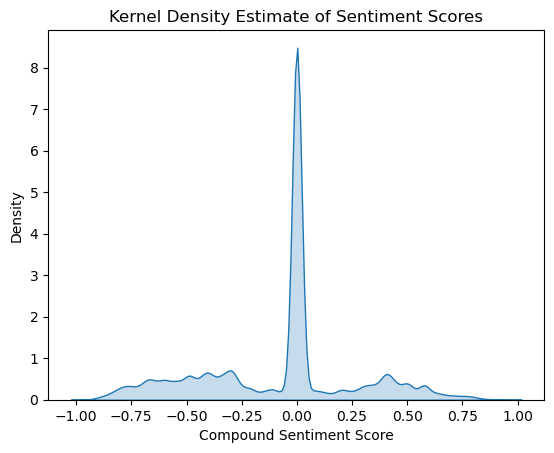

In [61]:
# Plot the sentiment scores distribution using Kernel Density Estimate (KDE)
#plt.figure(figsize=(10, 8))
sns.kdeplot(df_t['CSS'], fill=True)
plt.title('Kernel Density Estimate of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Density')

# Display the plot
plt.show()

In [62]:
#3.3. 

#make all token arrays in tokens column into a single list
comb_tokens = list(chain.from_iterable(df_t["tokens"]))
#print(comb_tokens)

In [63]:
#get frequency of words
w_freq = Counter(comb_tokens)
# convert w_freq to a df
bag_words = pd.DataFrame(w_freq.items(), columns=['Word', 'Frequency'])
bag_words = bag_words.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print(bag_words.head(20))
to_plot=bag_words.head(20)

          Word  Frequency
0       police      39851
1          new      33734
2          man      30760
3         says      23732
4           us      20424
5        court      18187
6    australia      17416
7         govt      17104
8      council      16988
9          nsw      16544
10   interview      15595
11        fire      15532
12  australian      13647
13          wa      13505
14      sydney      13246
15        plan      13002
16       water      12860
17       death      12778
18         qld      12602
19       crash      12379


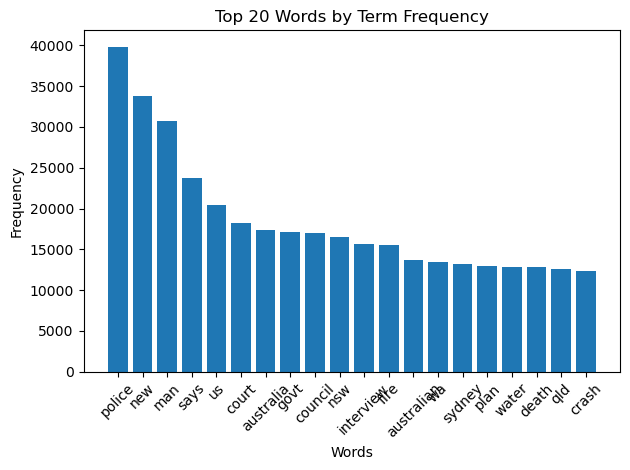

In [64]:
plt.bar(to_plot['Word'], to_plot['Frequency'])
plt.title('Top 20 Words by Term Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
#3.4. 

def cleanDoc(text):
    text=text.lower()
    text= re.sub(r'[^a-zA-Z\s]', '', text) #Remove non-alphabetic characters 
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces 
    tokens = word_tokenize(text)#tokenise
    tokens = [word for word in tokens if word not in string.punctuation] #remove puctuation marks
    lem_tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]#lemmatize
    
    text_stop_r = [word for word in lem_tokens if word not in stop_w] #remove stop words

    return text_stop_r
    
with open("C:/Users/Emmanuel/Documents/Data Science/ITNPA4-34 Natural Language Processing with Python/Project 1/news_corpus/article_000000.txt", 'r', encoding='utf-8') as file:
    content = file.read()

article_0 = cleanDoc(content)
#print(article_0)

with open("C:/Users/Emmanuel/Documents/Data Science/ITNPA4-34 Natural Language Processing with Python/Project 1/news_corpus/article_000001.txt", 'r', encoding='utf-8') as file:
    content = file.read()

article_1 = cleanDoc(content)
#print(article_1)

with open("C:/Users/Emmanuel/Documents/Data Science/ITNPA4-34 Natural Language Processing with Python/Project 1/news_corpus/article_000002.txt", 'r', encoding='utf-8') as file:
    content = file.read()

article_2 = cleanDoc(content)
#print(article_2)

with open("C:/Users/Emmanuel/Documents/Data Science/ITNPA4-34 Natural Language Processing with Python/Project 1/news_corpus/article_000003.txt", 'r', encoding='utf-8') as file:
    content = file.read()

article_3 = cleanDoc(content)
#print(article_3)

with open("C:/Users/Emmanuel/Documents/Data Science/ITNPA4-34 Natural Language Processing with Python/Project 1/news_corpus/article_000004.txt", 'r', encoding='utf-8') as file:
    content = file.read()

article_4 = cleanDoc(content)
#print(article_4)

with open("C:/Users/Emmanuel/Documents/Data Science/ITNPA4-34 Natural Language Processing with Python/Project 1/news_corpus/article_000005.txt", 'r', encoding='utf-8') as file:
    content = file.read()

article_5 = cleanDoc(content)
#print(article_5)

with open("C:/Users/Emmanuel/Documents/Data Science/ITNPA4-34 Natural Language Processing with Python/Project 1/news_corpus/article_000006.txt", 'r', encoding='utf-8') as file:
    content = file.read()

article_6 = cleanDoc(content)
#print(article_6)

with open("C:/Users/Emmanuel/Documents/Data Science/ITNPA4-34 Natural Language Processing with Python/Project 1/news_corpus/article_000007.txt", 'r', encoding='utf-8') as file:
    content = file.read()

article_7 = cleanDoc(content)
#print(article_7)

with open("C:/Users/Emmanuel/Documents/Data Science/ITNPA4-34 Natural Language Processing with Python/Project 1/news_corpus/article_000008.txt", 'r', encoding='utf-8') as file:
    content = file.read()

article_8 = cleanDoc(content)
#print(article_8)

with open("C:/Users/Emmanuel/Documents/Data Science/ITNPA4-34 Natural Language Processing with Python/Project 1/news_corpus/article_000009.txt", 'r', encoding='utf-8') as file:
    content = file.read()

article_9 = cleanDoc(content)
print(article_9)

['cnn', 'congress', 'ha', 'moved', 'prevent', 'money', 'proposed', 'billion', 'stimulus', 'package', 'used', 'zoo', 'aquarium', 'golf', 'course', 'swimming', 'pool', 'casino', 'effort', 'ensure', 'bill', 'fund', 'call', 'highest', 'quality', 'infrastructure', 'project', 'restriction', 'added', 'stimulus', 'proposal', 'would', 'keep', 'money', 'zoo', 'project', 'among', 'thing', 'purpose', 'bill', 'direct', 'funding', 'project', 'primarily', 'clearly', 'aimed', 'benefiting', 'economic', 'condition', 'community', 'public', 'large', 'bill', 'state', 'federal', 'government', 'level', 'government', 'directed', 'look', 'skeptical', 'eye', 'project', 'dont', 'meet', 'test', 'cnn', 'revealed', 'last', 'month', 'list', 'ready', 'go', 'stimulus', 'project', 'endorsed', 'u', 'conference', 'mayor', 'included', 'museum', 'zoo', 'renovation', 'aquatic', 'center', 'skateboard', 'park', 'bike', 'horse', 'path', 'one', 'zoo', 'project', 'report', 'million', 'polar', 'bear', 'exhibit', 'providence', 'rh

In [66]:
data = {
    'document': ['article_0', 'article_1', 'article_2','article_3', 'article_4', 'article_5','article_6', 'article_7', 'article_8','article_9'],
    'text': [article_0, article_1, article_2, article_3, article_4, article_5, article_6, article_7 ,article_8, article_9]
}
documents_df = pd.DataFrame(data)
copy_documents_df = pd.DataFrame(data) # to be used for TFIDF 
print(documents_df)

    document                                               text
0  article_0  [new, york, police, concerned, drone, could, b...
1  article_1  [ryan, lipman, perhaps, australian, porn, star...
2  article_2  [wa, sergio, garcia, conceded, much, like, hun...
3  article_3  [ebola, outbreak, began, guinea, four, month, ...
4  article_4  [associated, press, daily, mail, reporter, pub...
5  article_5  [jerusalem, woke, tuesday, horrific, image, sl...
6  article_6  [australian, father, believed, brainwashed, pr...
7  article_7  [mother, whose, premature, twin, died, lay, co...
8  article_8  [community, stalwart, mbe, ha, spared, jail, c...
9  article_9  [cnn, congress, ha, moved, prevent, money, pro...


In [67]:
#made from (‘articles_corpus.zip’)
copy_documents_df['text'] = copy_documents_df['text'].apply(lambda x: ' '.join(x))  #build tokens into articles again 
print(copy_documents_df['text'])

0    new york police concerned drone could become t...
1    ryan lipman perhaps australian porn star angel...
2    wa sergio garcia conceded much like hunted tig...
3    ebola outbreak began guinea four month ago ha ...
4    associated press daily mail reporter published...
5    jerusalem woke tuesday horrific image slain je...
6    australian father believed brainwashed preachi...
7    mother whose premature twin died lay coma foll...
8    community stalwart mbe ha spared jail claiming...
9    cnn congress ha moved prevent money proposed b...
Name: text, dtype: object


In [68]:
vectorizer = TfidfVectorizer()

matrix = vectorizer.fit_transform(copy_documents_df['text'])# TFIDF matrix
#print(matrix)

df_tfidf = pd.DataFrame(matrix.toarray(), columns = vectorizer.get_feature_names_out())
print(df_tfidf)

   abandoned     abbas    abbott     abdul      able  abruption       abu  \
0   0.000000  0.000000  0.000000  0.000000  0.029924   0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.021964   0.000000  0.000000   
3   0.031651  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
5   0.028063  0.033011  0.000000  0.000000  0.000000   0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.354301  0.000000   0.000000  0.039367   
7   0.000000  0.000000  0.000000  0.000000  0.014291   0.019215  0.000000   
8   0.000000  0.000000  0.068596  0.000000  0.000000   0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   

    abysmal    accept    access  ...   yearold  yearolds     yehya       yes  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.00

In [69]:
m_tfidf = df_tfidf.mean(axis=0).sort_values(ascending=False) #mean of tfidf across all docs
print(m_tfidf)

wa            0.099362
sinkhole      0.068812
drone         0.064913
said          0.059459
raja          0.051447
                ...   
itll          0.001921
experience    0.001921
fought        0.001921
answered      0.001921
rushed        0.001921
Length: 1719, dtype: float64


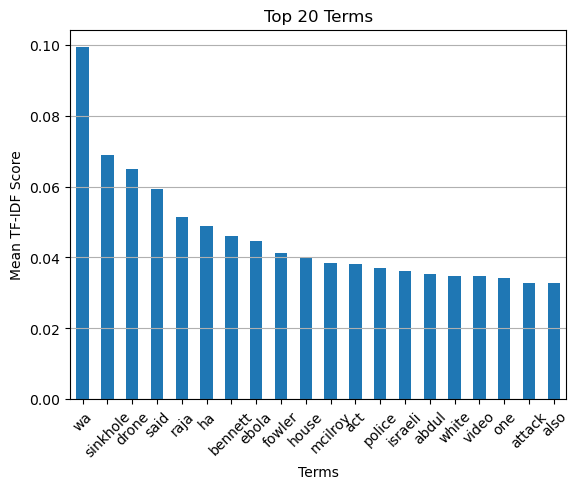

In [70]:
m_tfidf.head(20).plot(kind='bar')
plt.title(f'Top 20 Terms')
plt.xlabel('Terms')
plt.ylabel('Mean TF-IDF Score')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

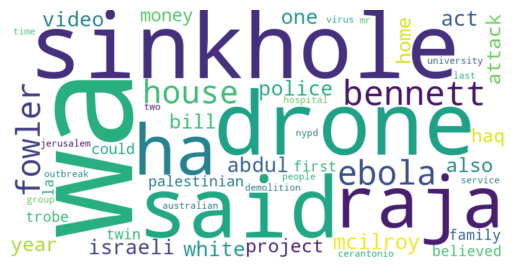

In [71]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(m_tfidf.head(50))
#plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis lines
plt.show()

### Q4

In [72]:
print(documents_df)

    document                                               text
0  article_0  [new, york, police, concerned, drone, could, b...
1  article_1  [ryan, lipman, perhaps, australian, porn, star...
2  article_2  [wa, sergio, garcia, conceded, much, like, hun...
3  article_3  [ebola, outbreak, began, guinea, four, month, ...
4  article_4  [associated, press, daily, mail, reporter, pub...
5  article_5  [jerusalem, woke, tuesday, horrific, image, sl...
6  article_6  [australian, father, believed, brainwashed, pr...
7  article_7  [mother, whose, premature, twin, died, lay, co...
8  article_8  [community, stalwart, mbe, ha, spared, jail, c...
9  article_9  [cnn, congress, ha, moved, prevent, money, pro...


In [73]:
# Create a dictionary
dictionary = corpora.Dictionary(documents_df['text'])# id to word (contains data about words like word count)
print(f"\nDictionary Tokens: {dictionary.token2id}") 


Dictionary Tokens: {'able': 0, 'accurate': 1, 'accurately': 2, 'acknowledged': 3, 'act': 4, 'advanced': 5, 'ago': 6, 'air': 7, 'aircraft': 8, 'airspace': 9, 'allow': 10, 'almost': 11, 'along': 12, 'also': 13, 'altitude': 14, 'angela': 15, 'antonio': 16, 'arrested': 17, 'assault': 18, 'attack': 19, 'aviation': 20, 'become': 21, 'bomb': 22, 'carry': 23, 'carrying': 24, 'case': 25, 'cbs': 26, 'chancellor': 27, 'chemical': 28, 'chief': 29, 'circled': 30, 'city': 31, 'collided': 32, 'come': 33, 'commit': 34, 'concern': 35, 'concerned': 36, 'consulting': 37, 'control': 38, 'could': 39, 'counter': 40, 'counterterrorism': 41, 'dark': 42, 'delivered': 43, 'deputy': 44, 'develop': 45, 'device': 46, 'different': 47, 'dipace': 48, 'dipaces': 49, 'done': 50, 'dramatic': 51, 'drone': 52, 'easily': 53, 'emergency': 54, 'england': 55, 'enough': 56, 'event': 57, 'explosive': 58, 'fear': 59, 'firearm': 60, 'flown': 61, 'flying': 62, 'follow': 63, 'foot': 64, 'football': 65, 'front': 66, 'german': 67, '

In [74]:
corpus = []
for text in documents_df['text']:
    newT = dictionary.doc2bow(text) # doc to bag of words
    corpus.append(newT)


In [75]:
print (corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 3), (20, 2), (21, 2), (22, 1), (23, 3), (24, 2), (25, 1), (26, 1), (27, 4), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 1), (38, 1), (39, 7), (40, 1), (41, 1), (42, 1), (43, 2), (44, 2), (45, 1), (46, 1), (47, 2), (48, 3), (49, 1), (50, 1), (51, 1), (52, 18), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 3), (59, 1), (60, 1), (61, 2), (62, 2), (63, 1), (64, 1), (65, 1), (66, 3), (67, 2), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 4), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 4), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 4), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 2), (103, 3), (104, 1), (105, 2), (106, 1), (107, 2), (108, 1), (109, 1), (110, 1

In [76]:
# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, random_state=42, passes=15, alpha='auto', per_word_topics=True)

topic1 = pd.DataFrame(columns=['word', 'weight']) 
topic2 = pd.DataFrame(columns=['word', 'weight']) 
topic3 = pd.DataFrame(columns=['word', 'weight']) 
topic4 = pd.DataFrame(columns=['word', 'weight']) 

#loop though the topics
for index in range(lda_model.num_topics):
    top_words = lda_model.show_topic(index, 50) # show the 50 top words in each topic
    for word, weight in top_words:
        if index == 0 :
            topic1.loc[len(topic1)] = [word, weight]
        elif index == 1 :
            topic2.loc[len(topic2)] = [word, weight]
        elif index == 2 :
            topic3.loc[len(topic3)] = [word, weight]
        elif index == 3 :
            topic4.loc[len(topic4)] = [word, weight]

print("Topic 1:")
print(topic1)

print("Topic 2:")
print(topic2)

print("Topic 3:")
print(topic3)

print("Topic 4:")
print(topic4)


Topic 1:
           word    weight
0            wa  0.015374
1          said  0.009176
2          raja  0.007265
3        fowler  0.006789
4            ha  0.006318
5          also  0.006313
6       mcilroy  0.006313
7         ebola  0.005835
8         first  0.005361
9         house  0.005360
10      israeli  0.005359
11         time  0.004884
12          one  0.004410
13         year  0.004409
14         well  0.004407
15  palestinian  0.004407
16        could  0.003933
17          two  0.003931
18         made  0.003931
19       attack  0.003931
20        month  0.003931
21         last  0.003456
22        group  0.003455
23       people  0.003455
24    jerusalem  0.003454
25   demolition  0.003454
26       family  0.002979
27         jail  0.002978
28         hole  0.002978
29       garcia  0.002978
30       health  0.002978
31        virus  0.002977
32         good  0.002977
33   deterrence  0.002977
34     outbreak  0.002977
35     security  0.002977
36         home  0.002503
37 

Topic 1:


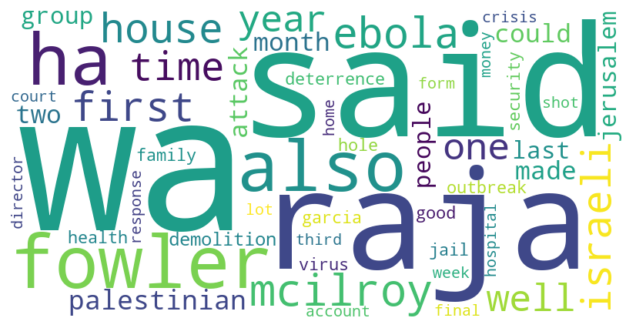

Topic 2:


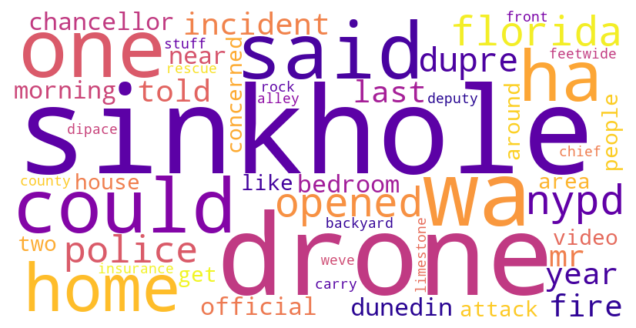

Topic 3:


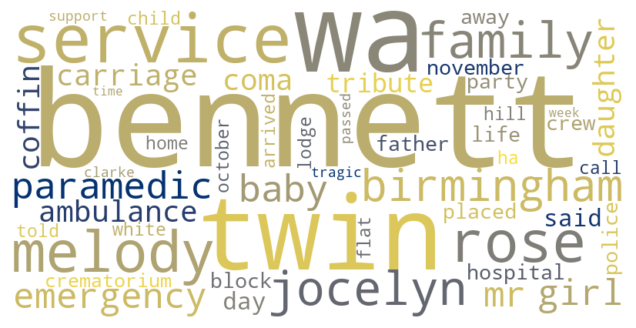

Topic 4:


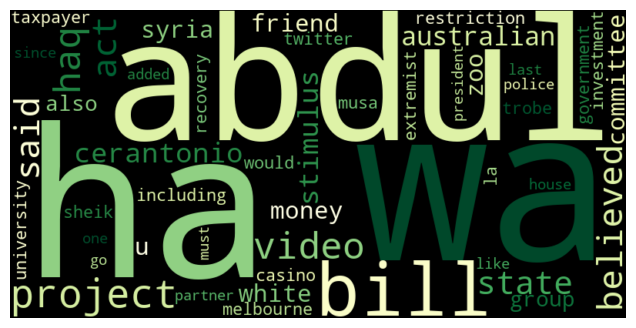

In [77]:
# 4.2.

#topic 1
print("Topic 1:")
topic1_dict = dict(zip(topic1['word'], topic1['weight']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic1_dict)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis lines
plt.show()

#topic 2
print("Topic 2:")
topic2_dict = dict(zip(topic2['word'], topic2['weight']))

wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='plasma').generate_from_frequencies(topic2_dict)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis lines
plt.show()

#topic 3
print("Topic 3:")
topic3_dict = dict(zip(topic3['word'], topic3['weight']))

wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='cividis').generate_from_frequencies(topic3_dict)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis lines
plt.show()

#topic 4
print("Topic 4:")
topic4_dict = dict(zip(topic4['word'], topic4['weight']))

wordcloud = WordCloud(width=800, height=400, background_color='black',colormap='YlGn').generate_from_frequencies(topic4_dict)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis lines
plt.show()

In [78]:
#4.3.
#plot
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.124445 -0.083445       1        1  42.988778
3     -0.067577  0.144860       2        1  23.092388
2      0.111525 -0.119638       3        1  18.299901
1      0.080498  0.058223       4        1  15.618932, topic_info=          Term       Freq      Total Category  logprob  loglift
1240   bennett  15.000000  15.000000  Default  30.0000  30.0000
863   sinkhole  12.000000  12.000000  Default  29.0000  29.0000
52       drone  11.000000  11.000000  Default  28.0000  28.0000
1419      twin   9.000000   9.000000  Default  27.0000  27.0000
135    service   9.000000   9.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
165      video   1.902328   9.246549   Topic4  -5.7638   0.2755
19      attack   1.901084   8.785863   Topic4  -5.7645   0.3260
812      house   1.900832  14.444172   Topic4  -5.7646  -0.1713
116     people   1.900511   9.964594   Topic4  -5.7648   0.1998
542        two   1.900436  10.759860   Topic4  -5.7648   0.1229

[223 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1098      2  0.888876    abdul
1431      1  0.861010  account
4         1  0.327363      act
4         2  0.545605      act
4         4  0.109121      act
...     ...       ...      ...
277       2  0.604582    would
177       1  0.607769     year
177       2  0.173648     year
177       4  0.173648     year
1719      2  0.988279      zoo

[265 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])